In [11]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

c:\Users\USER\ms-deep-learning\deep-learning\notebooks\deep-learning-basic
c:\Users\USER\ms-deep-learning\deep-learning\notebooks


In [12]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer
import numpy as np

In [13]:
# 1. mnist 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄이기
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 지정
use_dropout = True
dropout_ratio = 0.2

# 2. 학습 설정
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                        output_size=10, use_dropout = use_dropout, dropout_ration=dropout_ratio)

trainer = Trainer(network, x_train, t_train, x_test, t_test, 
                  epochs=301,
                  mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.3124552691552243
=== epoch:1, train acc:0.12666666666666668, test acc:0.1256 ===
train loss:2.308465887478421
train loss:2.3293115882051567
train loss:2.3044512862497024
=== epoch:2, train acc:0.13, test acc:0.1296 ===
train loss:2.3029313004202394
train loss:2.294055543893945
train loss:2.3085944936507796
=== epoch:3, train acc:0.12333333333333334, test acc:0.1317 ===
train loss:2.312169141448125
train loss:2.2987459111205033
train loss:2.293993040195498
=== epoch:4, train acc:0.12666666666666668, test acc:0.1339 ===
train loss:2.3091625865608036
train loss:2.3088681247983844
train loss:2.312364326014142
=== epoch:5, train acc:0.13, test acc:0.1362 ===
train loss:2.3039369099095186
train loss:2.297192630461689
train loss:2.305141771215489
=== epoch:6, train acc:0.14333333333333334, test acc:0.1379 ===
train loss:2.306320629996309
train loss:2.3001735422267937
train loss:2.302896893387333
=== epoch:7, train acc:0.15333333333333332, test acc:0.1356 ===
train loss:2.29671100

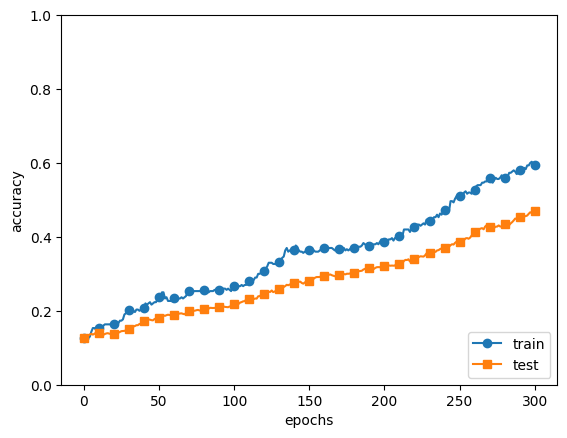

In [14]:
# 4. 그래프
markers = {'train' : 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker = 'o', label='train', markevery = 10)
plt.plot(x, test_acc_list, marker = 's', label='test', markevery = 10)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()